# Описание датасета abalon и задача



Пол - номинальный - M, F и I (детеныш)

Длина - непрерывная - мм - самое длинное измерение раковины

Диаметр - непрерывный - мм - перпендикулярно длине

Высота - непрерывная - мм - с мясом в раковине

Весь вес - непрерывный - граммы - целое морское ушко

Вес очищенного от раковины - непрерывный - граммы - вес мяса

Вес внутренностей - непрерывный - граммы - вес кишечника (после обескровливания)

Вес раковины - непрерывный - граммы - после сушки

Колечки - целое - +1,5 дает возраст в годах (целевой)

Задача предсказать возраст морского ушка по физическим измерениям

# Импорт библиотек и загрузка данных



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
import polars as pl
from google.colab import drive


In [ ]:
abalone = 'https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/refs/heads/main/datasets/abalone.csv'
df = pd.read_csv(abalone)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Общее исследование данных


Датасет состоит из 4177 строк и 9 столбцов

In [ ]:
df.shape


(4177, 9)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


In [ ]:
df.describe(include = 'all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,NaN,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000


Дупликатов в датасете нет

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


Добавим столбец возраст в датасет

In [ ]:
df['Age'] = df['Rings'] * 1.5


# Однофакторный анализ

In [ ]:
rows_with_na = df[df.isnull().any(axis=1)]

print(rows_with_na)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
3      M   0.440     0.365   0.125           NaN          0.2155   
43     I   0.205     0.150   0.055           NaN          0.0255   
64     M   0.520       NaN   0.120        0.5800          0.2340   
102    M   0.530     0.435   0.160           NaN          0.3160   
127    I   0.385       NaN   0.085        0.2505          0.1120   
...   ..     ...       ...     ...           ...             ...   
4128   M   0.555     0.435   0.145           NaN          0.4040   
4138   M   0.630     0.490   0.155           NaN          0.5350   
4143   F   0.655       NaN   0.220        1.3590          0.6420   
4163   I   0.390       NaN   0.085        0.3440          0.1810   
4164   I   0.390     0.290   0.100        0.2845          0.1255   

      Viscera weight  Shell weight  Rings   Age  
3             0.1140         0.155     10  15.0  
43            0.0150         0.012      5   7.5  
64            0.1315         0.18

В столбцах Diameter, Whole weight, Shell weight около 2-х процентов пропусков

In [ ]:
df.isnull().mean()*100

,0
Sex,0.000000
Length,0.000000
Diameter,2.370122
Height,0.000000
Whole weight,2.370122
Shucked weight,0.000000
Viscera weight,0.000000
Shell weight,1.197031
Rings,0.000000
Age,0.000000


Заменяем пропуски медианой

In [ ]:
median_Diameter = df['Diameter'].median()
df['Diameter'].fillna(median_Diameter, inplace = True)
median_Whole_weight = df['Whole weight'].median()
df['Whole weight'].fillna(median_Whole_weight, inplace = True)
median_Shell_weight = df['Shell weight'].median()
df['Shell weight'].fillna(median_Shell_weight, inplace = True)

Убедимся, что избавились от пропусков

In [ ]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0
Age,0


Распределение числовых столбцов


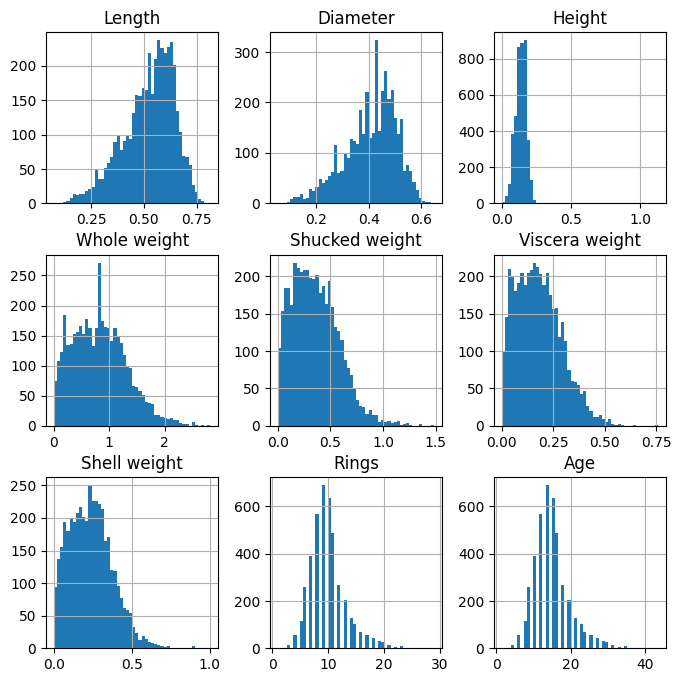

In [ ]:
df.hist(bins=50, figsize=(8,8));

## Пол

Учитывая, что морские ушки могут быть только F, M и I, то, очевидно, что f - ошибка ввода, и, 195 объектов относятся к полу F

In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,1447
I,1276
F,1259
f,195


Заменили f на F

In [ ]:
df['Sex']=df['Sex'].replace('f', 'F')


Как влияет пол на возраст морского ушка?
В среднем женский пол немного старше мужского

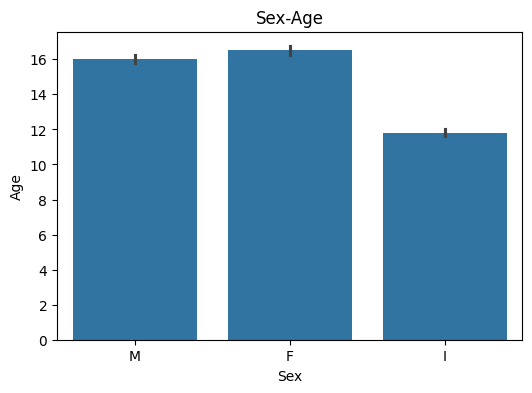

In [ ]:
plt.figure(figsize=(6 , 4))
sns.barplot(data = df, x = df['Sex'], y = df['Age'])
plt.title('Sex-Age')
plt.show();

In [ ]:
df.groupby(df['Sex'])['Age'].mean()

,Age
Sex,
F,16.502063
I,11.808386
M,16.017968


Существенной разницы между средним и медианным значением колец в зависимости от пола нет, что говорит, что аномальных значений в распределении нет

In [ ]:
df.groupby(df['Sex'])['Age'].median()

,Age
Sex,
F,15.0
I,12.0
M,15.0


##Длина, высота и вес

Женские и мужские особи не значительно отличаются друг от друга по размерам и весу (женские немного больше)

In [ ]:
descriptive_stats_length = df.groupby('Sex')['Length'].describe()
descriptive_stats_length

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1454.0,0.572978,0.093264,0.130,0.520,0.585,0.64,0.815
I,1276.0,0.427273,0.108615,0.075,0.360,0.435,0.51,0.725
M,1447.0,0.560059,0.102661,0.155,0.505,0.580,0.63,0.780


In [ ]:
descriptive_stats_length_Whole_weight = df.groupby('Sex')['Whole weight'].describe()
descriptive_stats_length_Whole_weight

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1454.0,1.017649,0.447542,0.0130,0.695750,0.99475,1.296625,2.8255
I,1276.0,0.438131,0.289523,0.0020,0.210875,0.39100,0.611625,2.0495
M,1447.0,0.977255,0.458503,0.0155,0.679500,0.95500,1.247000,2.7795


In [ ]:
descriptive_stats_Height= df.groupby('Sex')['Height'].describe()
descriptive_stats_Height

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1454.0,0.155959,0.040547,0.015,0.135,0.155,0.175,1.130
I,1276.0,0.107931,0.031971,0.000,0.085,0.110,0.130,0.220
M,1447.0,0.150847,0.034908,0.025,0.130,0.150,0.175,0.515


In [ ]:
np.corrcoef(df['Whole weight'], df['Length'])[0][1]

0.9154258887966625

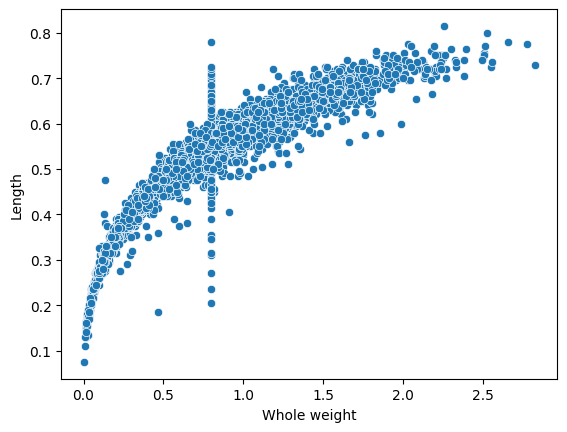

In [ ]:
sns.scatterplot(data = df, x = df['Whole weight'], y = df['Length'] );

Структура веса молюска. Панцирь состовляет больше половины веса молюска

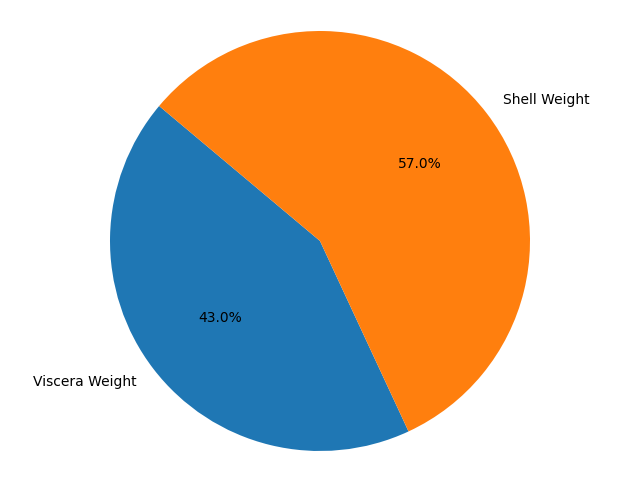

In [ ]:

weights = [
    df['Viscera weight'].sum(),
    df['Shell weight'].sum()
]

labels = ['Viscera Weight', 'Shell Weight']

plt.figure(figsize=(8, 6))
plt.pie(weights, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.show()

Взаимосвязь между количественными переменными и возрастом

Как видно из графиков распределения, большая часть переменных имеет нелинейное отношение с возрастом молюска

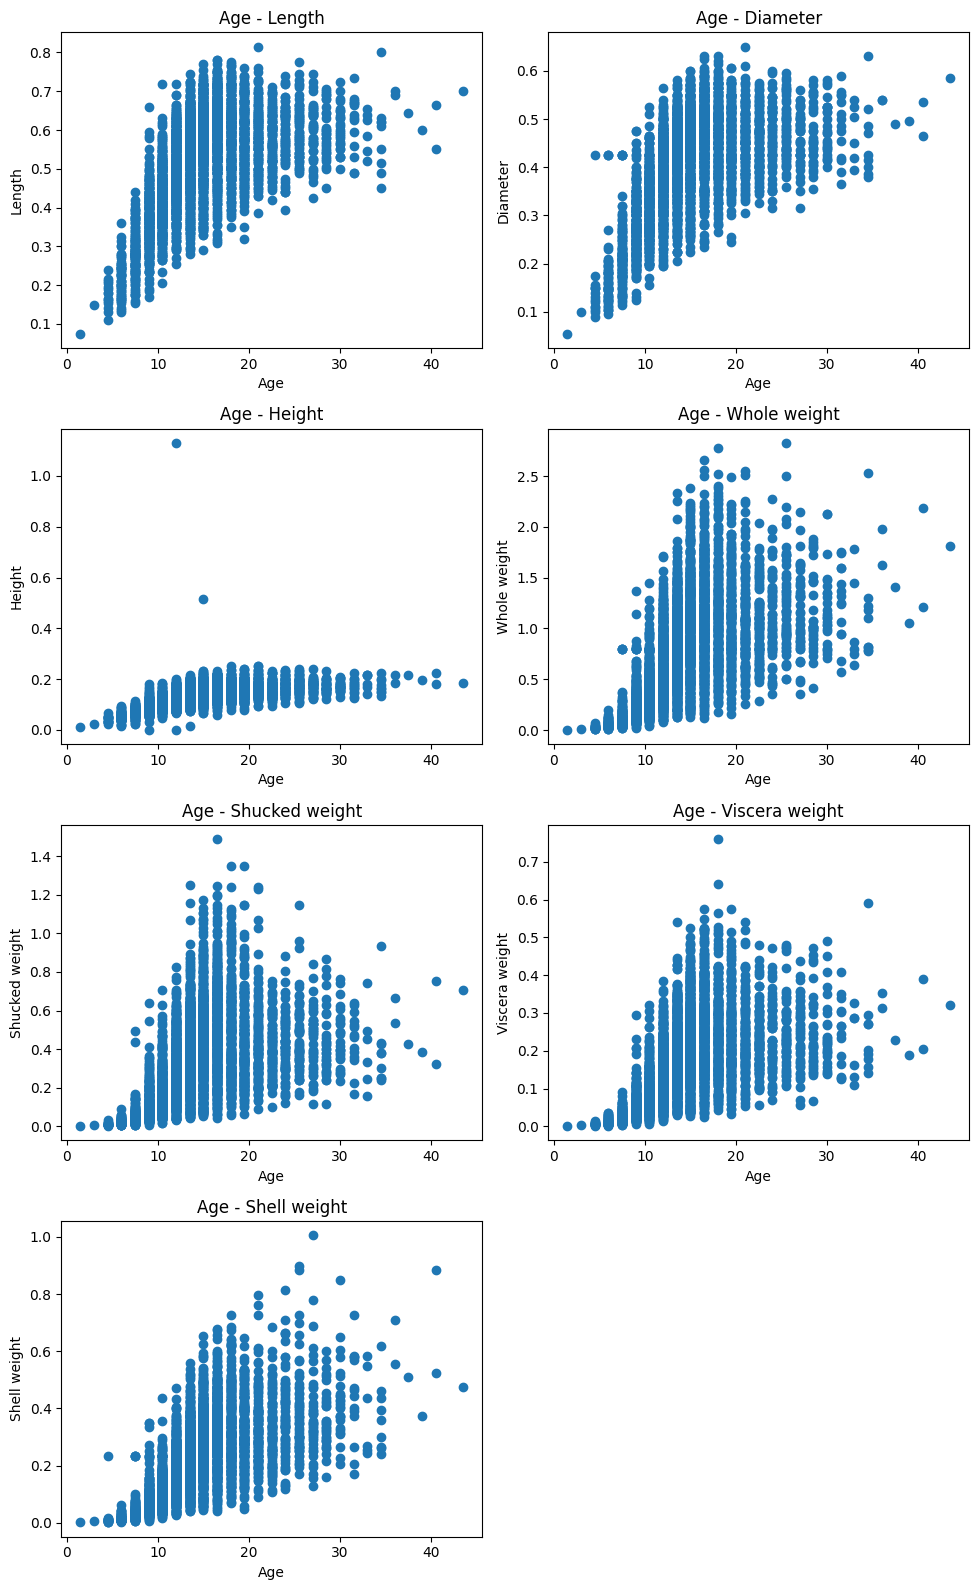

In [ ]:
columns = list(df.columns)[1:-2]
num_columns = len(columns)
num_rows = (num_columns // 2) + (num_columns % 2)

fig, axs = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

axs = axs.flatten()

for i, col in enumerate(columns):
    axs[i].scatter(df['Age'], df[col])
    axs[i].set_title(f'Age - {col}')
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel(col)

plt.tight_layout()

if num_columns % 2 != 0:
    axs[-1].axis('off')
plt.show()

В переменной Height присутствуют 2 выброса. Для обучения модели будет необходимо избавится от них

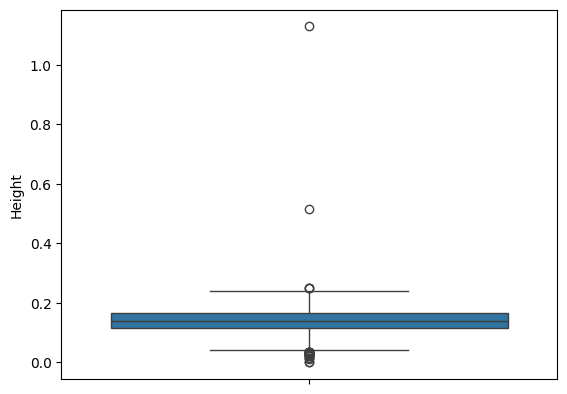

In [ ]:
sns.boxplot(data = df.Height);

Аномальные значения Height

In [ ]:
top_heights = df.nlargest(2, 'Height')
print(top_heights[['Height', 'Age']])


      Height   Age
2051   1.130  12.0
1417   0.515  15.0


In [ ]:
df.iloc[[2051, 1417]]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8,12.0
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10,15.0


Типичными значениями Height для возраста 13 и 15 лет является 0,15. Маловероятным представляются молюски размером в 5 или 10 раз больше медианного

In [ ]:
filtered_df_13 = df[df.Age.isin([13, 15])]
filtered_df_13.Height.mean()

0.1540930599369085

Заменим значение Height для строк 2051 и 1417

In [ ]:
df.loc[[2051, 1417], 'Height'] = filtered_df_13.Height.mean()

# Матрицы корреляций

Как и было показано на графиках распределения, нелинейная корреляция лучше отражает связи между переменными.

В то же время, среди переменных нет тех, которые сильнее прочих коррелировали с возрастом молюска

1. Линейная корреляция

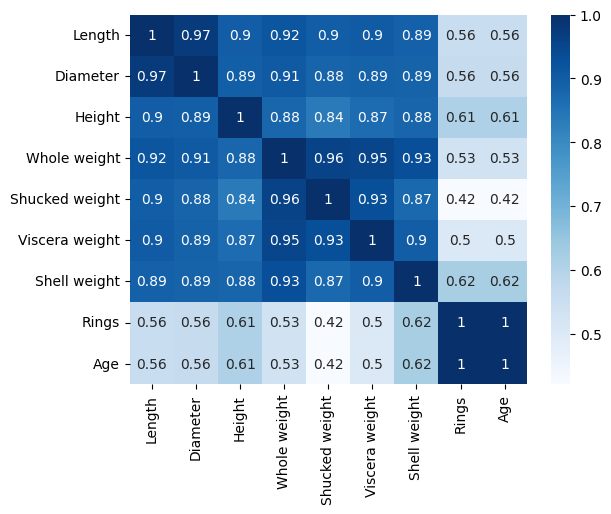

In [ ]:
corr_matrix_pearson = df.corr(numeric_only=True)
sns.heatmap(data=corr_matrix_pearson,   cmap="Blues",annot=True);

2. Корреляция Спирмана

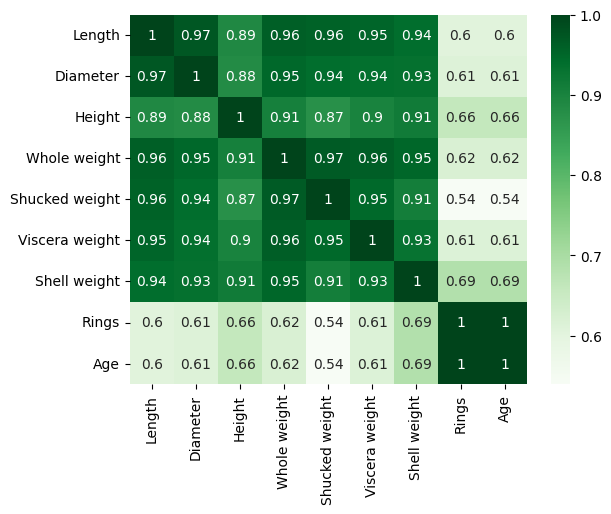

In [ ]:
corr_matrix_spearman = df.corr(method = 'spearman', numeric_only=True)
sns.heatmap(corr_matrix_spearman, cmap='Greens', annot = True);

3. Корреляция Кендала

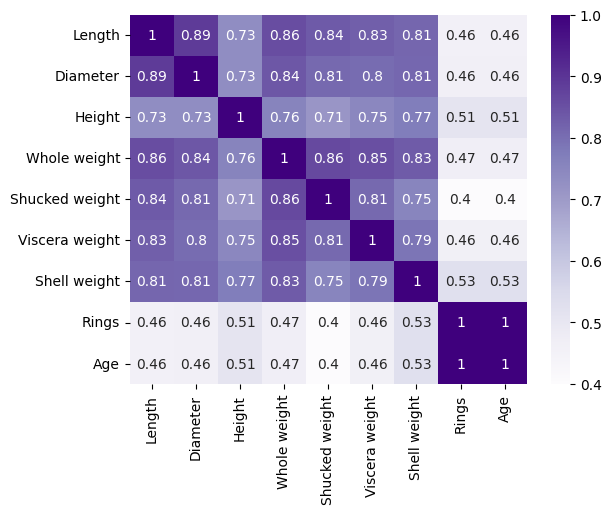

In [ ]:
corr_matrix_kendall = df.corr(method = 'kendall', numeric_only = True)
sns.heatmap(corr_matrix_kendall, cmap = 'Purples', annot = True);

ANOVA: Пол молюска коррелирует со всеми параметрами объекта

In [ ]:
abalone_data = []
for c1 in df.columns:
  for c2 in df.columns:
    if df[c1].dtype == 'object' and df[c2].dtype != 'object':
      category_type_list = df.groupby(c1)[c2].apply(list)
      anova_result = f_oneway(*category_type_list)

      if anova_result[1] >= 0.05:
        abalone_data.append({'category' : c1, 'Numeric' : c2, 'Is_correlated' : 'No'})
      else:
        abalone_data.append({'category' : c1, 'Numeric' : c2, 'Is_correlated' : 'Yes'})
anova_res = pd.DataFrame.from_dict(abalone_data)
anova_res

,category,Numeric,Is_correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes
8,Sex,Age,Yes


#Анализ целевой переменной - Возраст

У переменной возраст есть хвост, что будет негативно сказываться на построении модели регрессии

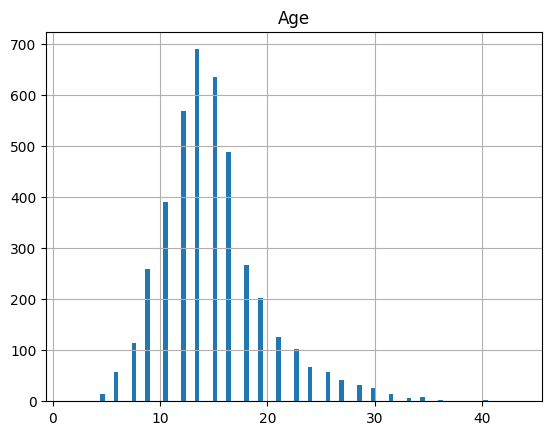

In [ ]:
df.hist('Age', bins = 100);

Проверка на нормальность распределения. Тест Колмогорова-Смирнова показывает, что возраст распределен не нормально

In [ ]:
p_value = 0.01
lil_res = lilliefors(df['Age'])
if lil_res[1] < p_value:
  print(f'Значение {lil_res[1]} меньше уровня значимости, следовательно отвергаем гипотезу о нормальном распределении')
else:
  print(f'Значение {lil_res[1]} больше уровня значимости, следовательно нет оснований отвергнуть гипотезу о нормальном распределении')

Значение 0.0009999999999998899 меньше уровня значимости, следовательно отвергаем гипотезу о нормальном распределении


Тест Шапиро-Уилка показывает, что возраст распределен не нормально

In [ ]:
p_value = 0.01
shapiro_res = shapiro(df['Age'])
if shapiro_res[1] < p_value:
  print(f'Значение {shapiro_res[1]} меньше уровня значимости, следовательно отвергаем гипотезу о нормальном распределении')
else:
  print(f'Значение {shapiro_res[1]} больше уровня значимости, следовательно нет оснований отвергнуть гипотезу о нормальном распределении')

Значение 3.2591499915524437e-40 меньше уровня значимости, следовательно отвергаем гипотезу о нормальном распределении


#Сохранение датасета

In [ ]:
abalone_clear = df.copy()
abalone_clear

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,22.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,10.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,13.5
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10,15.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,10.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,16.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,15.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,13.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,15.0


In [ ]:
file_path = '/content/drive/My Drive/abalone/abalone_clear.csv'
import os
if not os.path.exists('/content/drive/My Drive/abalone'):
    os.makedirs('/content/drive/My Drive/abalone')

abalone_clear.to_csv(file_path, sep=';', index=False)

#Polars

Создаем новый датасет

In [ ]:
df_big = df.copy()
len(df_big)

4177

Увеличиваем датасет до 1000000 строк

In [ ]:
for i in range(250):
  df_big = pd.concat([df_big, df])

In [ ]:
df_big.to_csv('/content/drive/My Drive/df_big.csv', index=False)

In [ ]:
len(df_big)

1048427

##Загрузка данных

При загрузке поларс показывает себя быстрее в 3 раза, чем пандас

In [ ]:
%%time
pd_big_df = pd.read_csv('/content/drive/MyDrive/abalone/df_big.csv')

CPU times: user 9.58 ms, sys: 821 µs, total: 10.4 ms
Wall time: 38.2 ms


In [ ]:
%%time
pl_big_df = pl.read_csv('/content/drive/MyDrive/abalone/df_big.csv')

CPU times: user 2.21 ms, sys: 3.05 ms, total: 5.26 ms
Wall time: 12 ms


##Фильтрация данных

При первом запуске Пандас был в несколько раз быстрее, но при третьем поларс обогнал по скорости

In [ ]:
%%time
pd_big_df.query('Sex == "M"')

CPU times: user 6.08 ms, sys: 17 µs, total: 6.1 ms
Wall time: 5.89 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.1550,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10
...,...,...,...,...,...,...,...,...,...
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [ ]:
%%time
pl_big_df.filter(pl.col('Sex') == 'M')

CPU times: user 1.09 ms, sys: 959 µs, total: 2.05 ms
Wall time: 1.83 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""M""",0.44,0.365,0.125,null,0.2155,0.114,0.155,10
"""M""",0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
"""M""",0.43,0.35,0.11,0.406,0.1675,0.081,0.135,10
…,…,…,…,…,…,…,…,…
"""M""",0.55,0.43,0.13,0.8395,0.3155,0.1955,0.2405,10
"""M""",0.56,0.43,0.155,0.8675,0.4,0.172,0.229,8
"""M""",0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10


##Агрегация данных

Агрегацию проверить не удалось

In [ ]:
%%time
pd_big_df.groupby(pd_big_df['Sex'])['Rings'].mean()

CPU times: user 1.6 ms, sys: 77 µs, total: 1.68 ms
Wall time: 3.54 ms


,Rings
Sex,
F,11.138205
I,7.872257
M,10.678645
f,10.117949
